**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [278]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.neighbors import KDTree
#%load_ext pycodestyle_magic

In [325]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        
    def fit(self, X, y):
        self.training_data = X.astype(float)
        self._y = y
        self.classes_ = np.max(y) + 1
        if self.algorithm == 'kd_tree':
            self.KDTree = KDTree(self.training_data)
            
    def _predict(self, X):
        X = X.astype(float)
        if self.algorithm == "brute":
            return self._predict_brute(X)
        elif self.algorithm == "kd_tree":
            return self._predict_kd_Tree(X)
    
    def _predict_brute(self, X):
        X = X.astype(float) 
        size = X.shape[0]
        X_train = np.sum(self.training_data ** 2, axis = 1).reshape(1,-1)
        X_predict =  np.sum(X ** 2, axis = 1).reshape(-1, 1)
        distances = np.sqrt(X_predict - 2 * np.matmul(X, self.training_data.T) +
                       X_train)
        answer = np.argpartition(distances, range(self.n_neighbors),
                              axis=1)[:, :self.n_neighbors] 
        return self._y[answer]
    
    def _predict_kd_Tree(self, X):
        X = X.astype(float) 
        answer = self.KDTree.query(np.array(X, float), k=self.n_neighbors)[1]
        return self._y[answer[:, :self.n_neighbors]]
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)
    
    def predict_proba(self, X):
        near = self._predict(X)
        answer = np.zeros((X.shape[0], int(self.classes_)), float)
        for i in range(X.shape[0]):
            for arr in Counter(near[i]).most_common(int(self.classes_)):
                answer[i][int(arr[0])] = arr[1]
        return answer / self.n_neighbors
    
    def score(self, X, y):
         return np.average(y == self.predict(X))

**IRIS**

In [211]:
iris = datasets.load_iris()

In [212]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [213]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [214]:
%time clf.fit(X_train, y_train)

Wall time: 998 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [215]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [216]:
%time clf.predict(X_test)

Wall time: 0 ns


array([1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2])

In [217]:
%time my_clf.predict(X_test)

Wall time: 998 µs


array([1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2], dtype=int64)

In [218]:
%time clf.predict_proba(X_test)

Wall time: 0 ns


array([[0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

In [219]:
%time my_clf.predict_proba(X_test)

Wall time: 998 µs


array([[0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

In [220]:
clf.score(X_test, y_test)

0.8666666666666667

In [221]:
my_clf.score(X_test, y_test)

0.8666666666666667

Задание 3

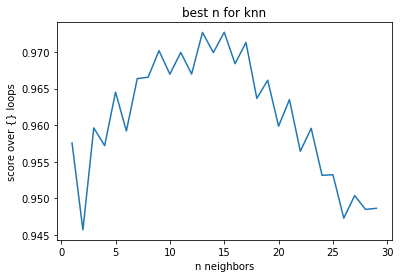

лучшие колличество соседий: 15


In [337]:
#%%pycodestyle
result = []
N_of_tests = 2000
for i in range(1,30):
    sub_result = []
    for j in range(N_of_tests):
        X_train, X_test, y_train, y_test = (
            train_test_split(
                iris.data, iris.target, test_size=0.15, stratify=iris.target
            )
        )
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        sub_result.append(my_clf.score(X_test, y_test))
    result.append(np.mean(sub_result))
result = np.array(result)

plt.plot(range(1,30), result)
plt.title('best n for knn')
plt.xlabel("n neighbors")
plt.ylabel("score over {} loops")
plt.show()

print("лучшие колличество соседий:" ,result.argmax()+1)

**MNIST**

In [261]:
mnist = fetch_mldata('MNIST original')

In [262]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [263]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [264]:
%time clf.fit(X_train, y_train)

Wall time: 17.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [265]:
%time my_clf.fit(X_train, y_train)

Wall time: 128 ms


In [266]:
%time clf.predict(X_test)

Wall time: 51.6 s


array([2., 3., 2., 5., 5., 9., 5., 8., 2., 9., 1., 4., 5., 5., 9., 4., 2.,
       6., 2., 1., 5., 4., 1., 3., 3., 3., 5., 8., 0., 4., 4., 6., 9., 2.,
       6., 4., 9., 9., 2., 5., 2., 9., 0., 9., 9., 5., 0., 5., 7., 2., 3.,
       1., 4., 0., 0., 5., 5., 3., 2., 3., 2., 7., 6., 3., 1., 4., 8., 8.,
       7., 0., 4., 7., 8., 5., 3., 1., 9., 2., 5., 5., 6., 4., 7., 6., 8.,
       9., 4., 4., 3., 2., 4., 7., 6., 1., 8., 2., 4., 5., 9., 8., 5., 6.,
       4., 9., 0., 8., 8., 6., 5., 6., 5., 4., 0., 4., 2., 3., 3., 1., 4.,
       7., 5., 0., 2., 1., 9., 6., 1., 9., 1., 5., 1., 2., 3., 6., 1., 1.,
       6., 9., 2., 1., 5., 3., 9., 7., 0., 0., 0., 6., 0., 3., 5., 3., 0.,
       0., 2., 2., 7., 0., 7., 3., 7., 3., 6., 2., 6., 4., 5., 3., 1., 3.,
       1., 3., 9., 2., 9., 0., 5., 8., 1., 4., 9., 6., 3., 7., 6., 1., 0.,
       4., 1., 8., 5., 4., 0., 4., 8., 8., 7., 8., 9., 1., 3., 5., 4., 1.,
       1., 2., 7., 3., 1., 5., 9., 0., 7., 3., 2., 5., 1., 6., 3., 2., 0.,
       7., 1., 9., 3., 5.

In [267]:
%time my_clf.predict(X_test)

Wall time: 1.24 s


array([2, 3, 2, 5, 5, 9, 5, 8, 2, 9, 1, 4, 5, 5, 9, 4, 2, 6, 2, 1, 5, 4,
       1, 3, 3, 3, 5, 8, 0, 4, 4, 6, 9, 2, 6, 4, 9, 9, 2, 5, 2, 9, 0, 9,
       9, 5, 0, 5, 7, 2, 3, 1, 4, 0, 0, 5, 5, 3, 2, 3, 2, 7, 6, 3, 1, 4,
       8, 8, 7, 0, 4, 7, 8, 5, 3, 1, 9, 2, 5, 5, 6, 4, 7, 6, 8, 9, 4, 4,
       3, 2, 4, 7, 6, 1, 8, 2, 4, 5, 9, 8, 5, 6, 4, 9, 0, 8, 8, 6, 5, 6,
       5, 4, 0, 4, 2, 3, 3, 1, 4, 7, 5, 0, 2, 1, 9, 6, 1, 9, 1, 5, 1, 2,
       3, 6, 1, 1, 6, 9, 2, 1, 5, 3, 9, 7, 0, 0, 0, 6, 0, 3, 5, 3, 0, 0,
       2, 2, 7, 0, 7, 3, 7, 3, 6, 2, 6, 4, 5, 3, 1, 3, 1, 3, 9, 2, 9, 0,
       5, 8, 1, 4, 9, 6, 3, 7, 6, 1, 0, 4, 1, 8, 5, 4, 0, 4, 8, 8, 7, 8,
       9, 1, 3, 5, 4, 1, 1, 2, 7, 3, 1, 5, 9, 0, 7, 3, 2, 5, 1, 6, 3, 2,
       0, 7, 1, 9, 3, 5, 2, 4, 9, 3, 4, 3, 9, 4, 0, 4, 0, 9, 3, 1, 6, 9,
       4, 4, 9, 6, 1, 7, 7, 8, 3, 2, 9, 4, 7, 8, 2, 3, 2, 2, 4, 3, 3, 7,
       1, 9, 0, 7, 1, 6, 9, 7, 7, 6, 2, 9, 7, 9, 6, 5, 6, 8, 7, 5, 3, 0,
       8, 5, 2, 9, 0, 2, 5, 0, 6, 1, 5, 0, 1, 5, 9,

In [268]:
%time clf.predict_proba(X_test)

Wall time: 52.1 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [269]:
%time my_clf.predict_proba(X_test)

Wall time: 1.27 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [270]:
clf.score(X_test, y_test)

0.9742857142857143

In [271]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 4

In [326]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [328]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [329]:
%time clf.fit(X_train, y_train)

Wall time: 18.4 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [330]:
%time my_clf.fit(X_train, y_train)

Wall time: 17.6 s


In [331]:
%time clf.predict(X_test)

Wall time: 51.7 s


array([4., 5., 2., 5., 6., 6., 1., 9., 1., 1., 4., 3., 0., 4., 4., 1., 2.,
       8., 5., 0., 2., 3., 6., 1., 4., 1., 4., 3., 0., 8., 9., 1., 5., 6.,
       7., 6., 7., 3., 8., 9., 8., 3., 7., 0., 1., 2., 4., 6., 0., 3., 7.,
       0., 4., 3., 0., 7., 0., 8., 0., 2., 4., 1., 4., 7., 9., 4., 5., 5.,
       2., 6., 1., 9., 8., 5., 1., 0., 6., 0., 5., 7., 5., 9., 3., 3., 8.,
       8., 9., 9., 1., 6., 8., 7., 9., 1., 8., 3., 2., 1., 8., 4., 8., 2.,
       2., 5., 4., 1., 2., 2., 2., 4., 4., 9., 3., 3., 0., 3., 7., 4., 2.,
       5., 2., 3., 4., 6., 6., 8., 9., 5., 8., 6., 5., 9., 8., 4., 3., 8.,
       9., 2., 7., 0., 9., 5., 1., 8., 3., 7., 9., 2., 2., 5., 3., 4., 0.,
       5., 2., 6., 8., 3., 6., 4., 6., 1., 7., 4., 4., 4., 7., 1., 6., 1.,
       5., 4., 5., 6., 2., 9., 5., 5., 7., 7., 1., 7., 7., 4., 1., 6., 3.,
       1., 5., 5., 9., 6., 5., 4., 5., 6., 5., 1., 9., 5., 8., 9., 7., 7.,
       3., 6., 9., 1., 0., 5., 6., 4., 7., 5., 1., 2., 4., 3., 4., 3., 9.,
       8., 7., 1., 7., 9.

In [332]:
%time my_clf.predict(X_test)

Wall time: 43 s


array([4, 5, 2, 5, 6, 6, 1, 9, 1, 1, 4, 3, 0, 4, 4, 1, 2, 8, 5, 0, 2, 3,
       6, 1, 4, 1, 4, 3, 0, 8, 9, 1, 5, 6, 7, 6, 7, 3, 8, 9, 8, 3, 7, 0,
       1, 2, 4, 6, 0, 3, 7, 0, 4, 3, 0, 7, 0, 8, 0, 2, 4, 1, 4, 7, 9, 4,
       5, 5, 2, 6, 1, 9, 8, 5, 1, 0, 6, 0, 5, 7, 5, 9, 3, 3, 8, 8, 9, 9,
       1, 6, 8, 7, 9, 1, 8, 3, 2, 1, 8, 4, 8, 2, 2, 5, 4, 1, 2, 2, 2, 4,
       4, 9, 3, 3, 0, 3, 7, 4, 2, 5, 2, 3, 4, 6, 6, 8, 9, 5, 8, 6, 5, 9,
       8, 4, 3, 8, 9, 2, 7, 0, 9, 5, 1, 8, 3, 7, 9, 2, 2, 5, 3, 4, 0, 5,
       2, 6, 8, 3, 6, 4, 6, 1, 7, 4, 4, 4, 7, 1, 6, 1, 5, 4, 5, 6, 2, 9,
       5, 5, 7, 7, 1, 7, 7, 4, 1, 6, 3, 1, 5, 5, 9, 6, 5, 4, 5, 6, 5, 1,
       9, 5, 8, 9, 7, 7, 3, 6, 9, 1, 0, 5, 6, 4, 7, 5, 1, 2, 4, 3, 4, 3,
       9, 8, 7, 1, 7, 9, 5, 0, 8, 5, 4, 0, 2, 0, 5, 3, 4, 8, 2, 6, 1, 5,
       4, 8, 9, 2, 7, 7, 1, 0, 7, 7, 1, 7, 1, 0, 0, 8, 3, 9, 3, 9, 9, 5,
       1, 8, 2, 6, 2, 2, 2, 6, 0, 0, 3, 2, 3, 1, 5, 6, 6, 3, 4, 1, 5, 7,
       0, 7, 5, 0, 9, 5, 3, 6, 1, 1, 4, 4, 7, 6, 8,

In [333]:
%time clf.predict_proba(X_test)

Wall time: 51.8 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [334]:
%time my_clf.predict_proba(X_test)

Wall time: 43 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [335]:
clf.score(X_test, y_test)

0.97

In [336]:
my_clf.score(X_test, y_test)

0.97

Задание 5

In [338]:
# seaborn
Удобная библиотека для визуализации данных, основанная на matplotlib
# matplotlib
библеотека для построения различных граффиков
# train_test_split
функция, которая разделяет выборку на две части, можно задать пропорции.
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
используется для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler)
Нужен для стандартизации данных
# ClassifierMixin
Класс от которого наследуются все классификаторы
# NeighborsBase
Класс от которого наследуются все neigbors классификаторы
# KNeighborsMixin
Класс от которого наследуются все к-nn классификаторы
# SupervisedIntegerMixin
базовый класс для метода fit

SyntaxError: invalid syntax (<ipython-input-338-f5075448815a>, line 2)